# Kuramoto on the circle

$$d X_t^i = \left( 2 \sin(2 X_t^i) - \frac{1}{N} \sum_{j=1}^{N}  \sin(X_t^i - X_t^j) \right)  dt + \sqrt{2\sigma} d W_t^i, \quad X_0^i \sim \operatorname{Unif}$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import Algorithms_for_EDMD

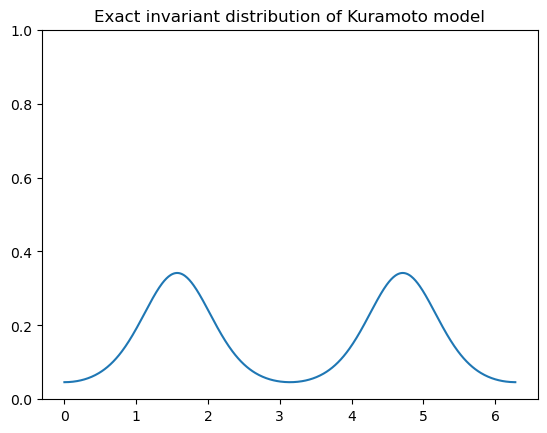

In [3]:
def invariant_distribution(sigma):
    x_axis = np.arange(0, 2*np.pi, 0.01) 
    y=np.exp(-np.cos(2*x_axis)/sigma)
    area = np.trapz(y, dx=0.01)
    plt.plot(x_axis,1/area*y)
    plt.ylim(0,1)
    plt.title('Exact invariant distribution of Kuramoto model')
    
invariant_distribution(1)
    

In [9]:
def phi(x):
    return np.sin(x)

def interaction_term(X1,X2,p): 
    X1=np.reshape(X1,(p,1))
    X2=np.reshape(X2,(p,1))
    ones = np.ones((1,p))
    A1 = X1 @ ones
    A2 = ones.T @ X2.T
    B=A1-A2
    B2 = phi(B)
    sum = np.sum(B2, axis=1)
    return 1/p*sum


def scheme_Kuramoto(Dt,n,sigma,X0,dB,p):
    Xemt = X0 
    SS=interaction_term(Xemt,Xemt,p)
    Xem = []
    Xem.append(Xemt)
    for i in range(n):
        # print(i)
        Xemt = Xemt + (2*np.sin(2*Xemt) - (SS))* Dt  + np.sqrt(2*sigma)  * dB[i,:]
        SS=interaction_term(Xemt,Xemt,p)
        Xemt=Xemt%(2*np.pi)
        Xem.append(Xemt) 
    return Xem


def scheme_Kuramoto_decoupled(Dt,n,sigma,X0,dB,mu,p):
    Xemt = X0 
    SS=interaction_term(Xemt,mu[0,:],p)
    Xem = []
    Xem.append(Xemt)
    for i in range(n):
        # print(i)
        Xemt = Xemt + (2*np.sin(2*Xemt) - (SS))* Dt  + np.sqrt(2*sigma)  * dB[i,:]
        if i<n-2:
            SS=interaction_term(Xemt,mu[i+1,:],p)
        Xemt=Xemt%(2*np.pi)
        Xem.append(Xemt)
    return Xem


def create_data_decoupled(Dt,T,sigma,p):
    t = np.arange(Dt, T + Dt, Dt)
    n = len(t)
    dB = np.sqrt(Dt) * np.random.randn(n,p)
    X0=np.random.uniform(low=0, high=2*np.pi, size=p)
    mu=np.array(scheme_Kuramoto(Dt,n,sigma,X0,dB,p))
    # print(np.shape(mu[0,:]))
    dB = np.sqrt(Dt) * np.random.randn(n,p)
    X0=np.random.uniform(low=0, high=2*np.pi, size=p)
    Xem=np.array(scheme_Kuramoto_decoupled(Dt,n,sigma,X0,dB,mu,p))
    return Xem 

In [10]:
# Set parameters
Dt=0.01
T=5
sigma=1
p=5000

# Create data
Xem = create_data_decoupled(Dt,T,sigma,p)

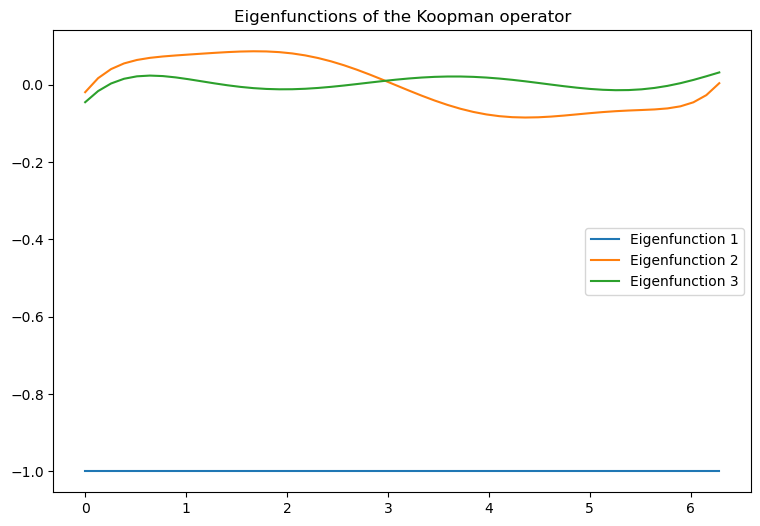

array([ 1.       +0.j        ,  0.1816652+0.j        ,
       -0.0227587-0.01694302j])

In [21]:
dataXem = Xem[0,:]
dataYem = Xem[-1,:]

dataXem=np.reshape(dataXem,(1,p))
dataYem=np.reshape(dataYem,(1,p))

Algorithms_for_EDMD.find_eigenfunctions_eigenvalues_1D(dataXem,dataYem,oper='K',num_evs=3,xlima=0,xlimb=2*np.pi,num_boxes=50,sigma=0,num_mon=7
                                   ,type_of_basis='mon',plot_efunctions=True)